## IMPORTING LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

### Importing Dataset

In [26]:
df = pd.read_csv('Diwali Sales Data1.csv', encoding= 'unicode_escape')

In [27]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [28]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [29]:
df.shape

(11251, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Droping Null Columns

In [31]:
df.drop(["Status","unnamed1"], axis=1, inplace=True)

In [32]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Checking for duplicate value

In [35]:
df.duplicated().sum()

8

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

0

### Changing the data type

In [38]:
df['Amount']=df['Amount'].astype('int')

In [39]:
df['Amount'].dtypes

dtype('int32')

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Renaming Columns

In [41]:
df=df.rename(columns={'Age Group':'Age_Group'})

In [42]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


### Viewing statistics of numerical columns

In [43]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Viewing statstics of Categorical columns

In [44]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age_Group,State,Zone,Occupation,Product_Category
count,11231,11231,11231,11231,11231,11231,11231,11231
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7828,4536,1942,4287,1581,2653


### Outliers

<Figure size 2000x1500 with 0 Axes>

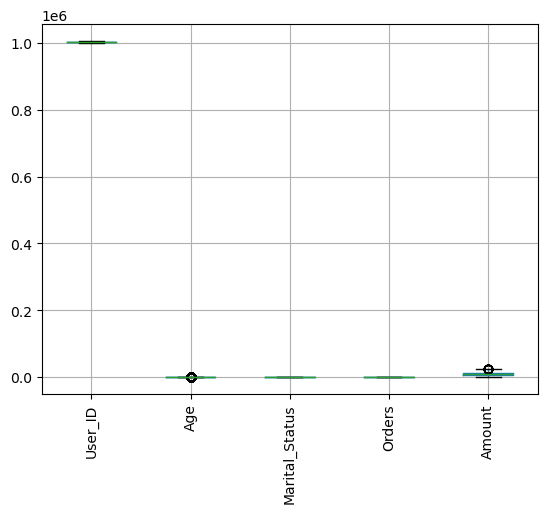

<Figure size 2000x1500 with 0 Axes>

In [45]:
df.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

<Figure size 800x600 with 0 Axes>

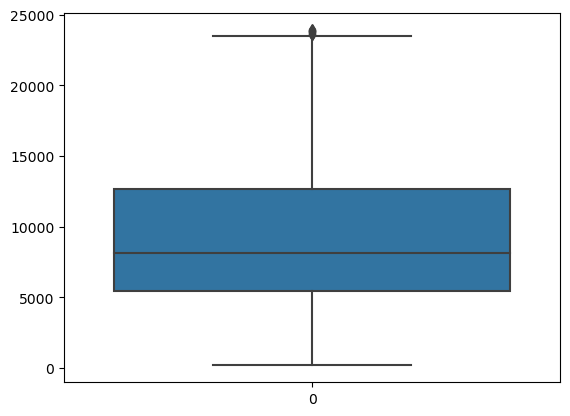

<Figure size 800x600 with 0 Axes>

In [46]:
sns.boxplot(df['Amount'])
plt.figure(figsize=(8,6))

# DATA VISUALIZATION

## Q1.WHAT IS THE NUMBER  OF PURCHASE DONE BY DIFFERENT GENDER

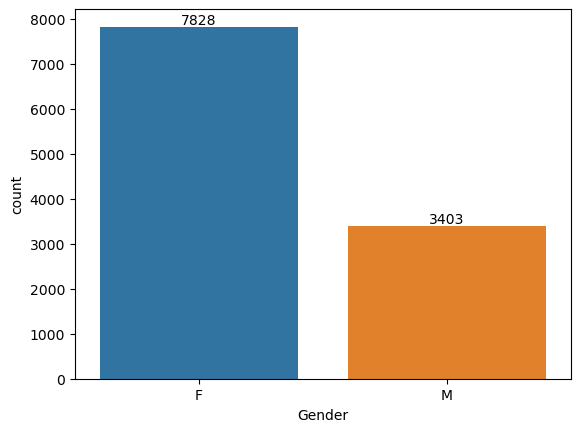

In [47]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


## Q2. WHAT IS THE AMOUNT SPEND BY DIFFERNT GENDERS ON PURCHACHING?

In [48]:
df.groupby(['Gender'],as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74307679
1,M,31871146


<Axes: xlabel='Gender', ylabel='Amount'>

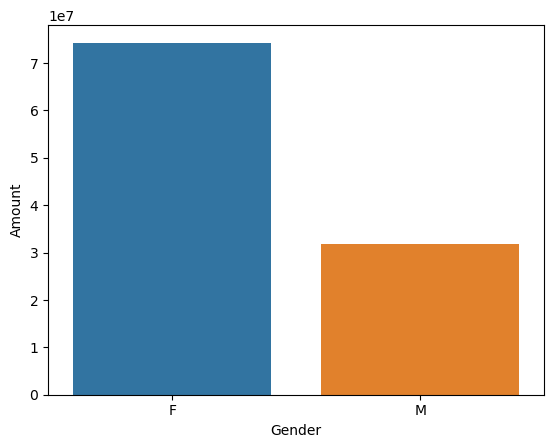

In [49]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Q3.WHICH AGE GROUP HAS HEIGHEST NUMBER OF PURCHASES?

<Axes: xlabel='Age_Group', ylabel='count'>

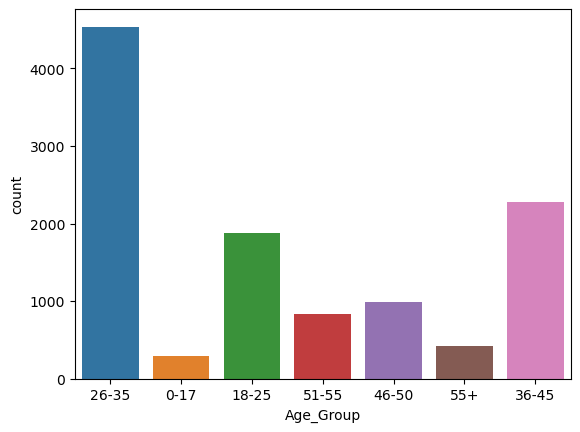

In [50]:
sns.countplot(data=df,x='Age_Group')

## Q4. How does the distribution of 'Age Group' vary between different genders??

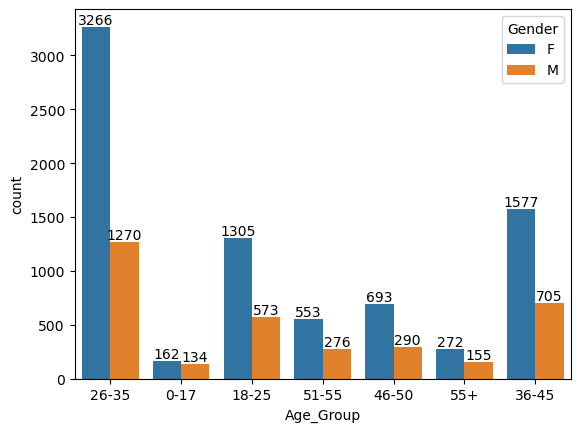

In [51]:
ax1=sns.countplot(data=df,x='Age_Group',hue='Gender')

for bars in ax1.containers:
    ax1.bar_label(bars)

## Q5. WHAT IS THE AMOUNT SPEND BY DIFFERNT AGE GROUP ON PURCHACHING?

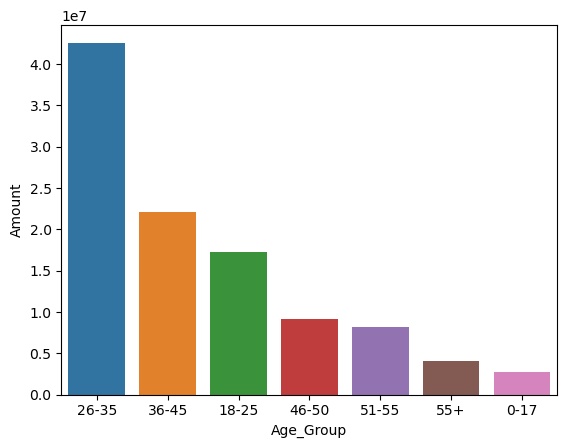

In [52]:
sales_age=df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax2=sns.barplot(x='Age_Group',y='Amount',data=sales_age)

##### From above graph we can see that most of the buyers are of the age group betwwen 26-35 years female

# STATE

## Q6 What is the distribution of customers across different states?

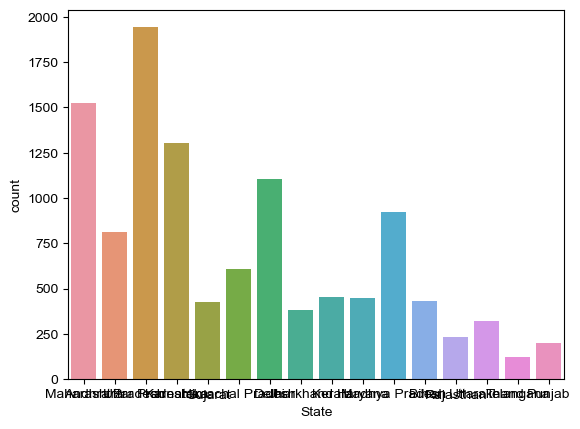

In [53]:
sns.countplot(x='State',data=df)
sns.set(rc={'figure.figsize':(36,15)})


## Q7 Which states have the highest number of orders?

<Axes: xlabel='State', ylabel='Orders'>

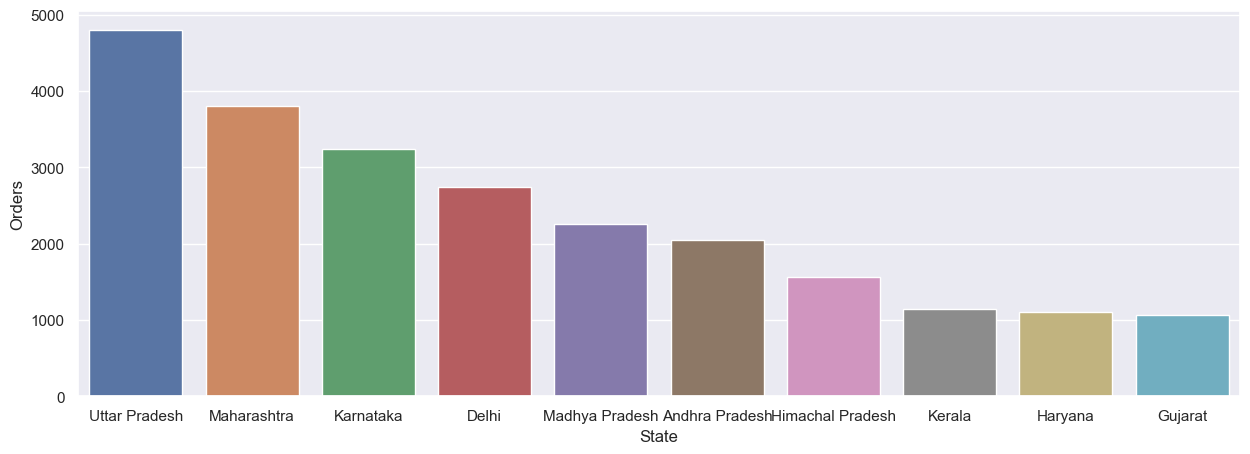

In [54]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x='State',y='Orders',data=sales_state)

## Q8 WHAT IS THE AMOUNT SPEND BY DIFFERNT STATES ON PURCHACHING?

<Axes: xlabel='State', ylabel='Amount'>

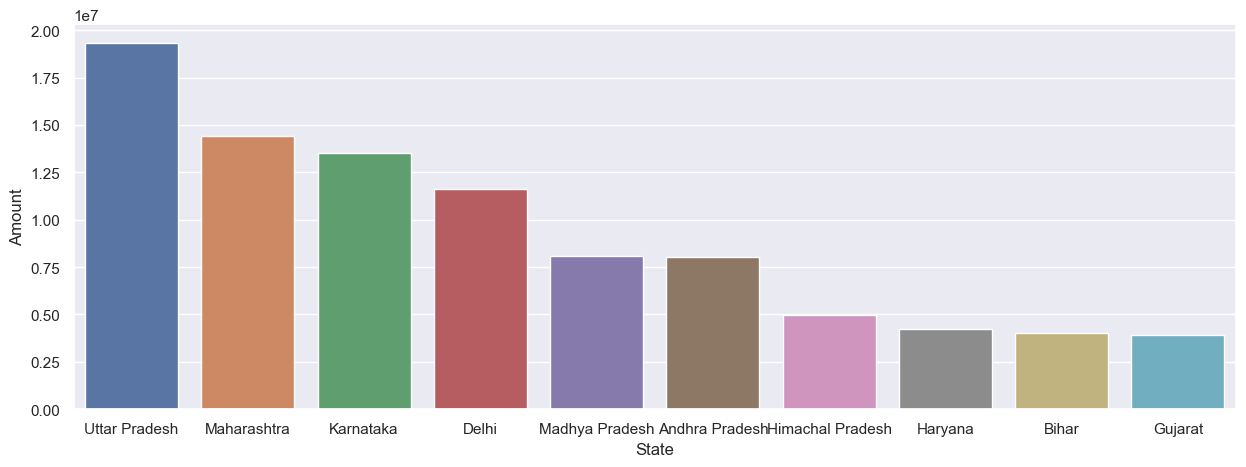

In [55]:
sales_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(x='State',y='Amount',data=sales_amount)

# Zone

## Q9 What is the distribution of customers across different zones?

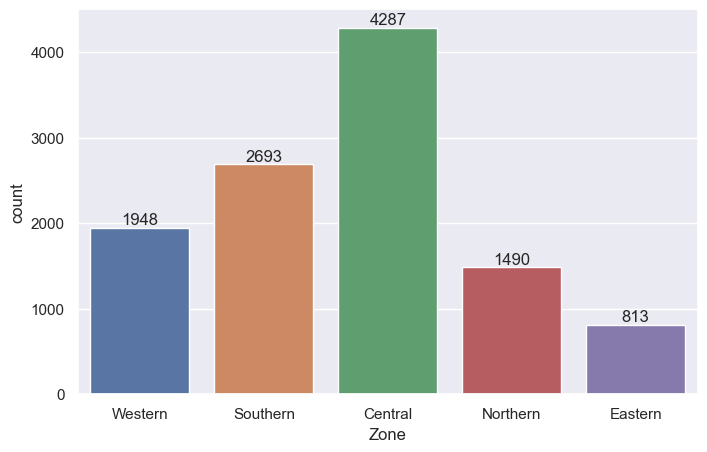

In [56]:
sns.set(rc={'figure.figsize':(8,5)})

ax4=sns.countplot(x='Zone',data=df)

for bars in ax4.containers:
    ax4.bar_label(bars)

## Q10. WHAT IS THE AMOUNT SPEND BY PEOPLE OF DIFFERNT ZONES ON PURCHACHING?

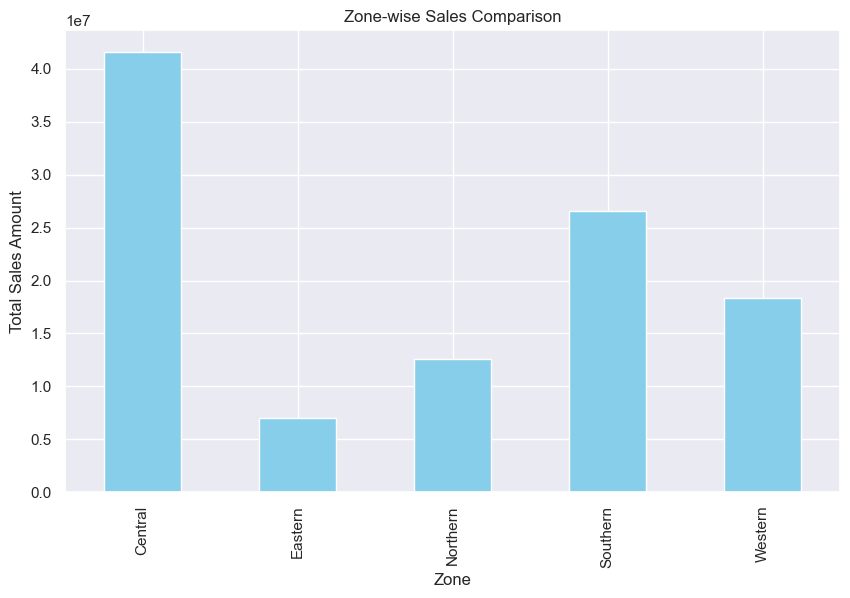

In [57]:
zone_sales = df.groupby('Zone')['Amount'].sum()
plt.figure(figsize=(10, 6))
zone_sales.plot(kind='bar', color='skyblue')
plt.title('Zone-wise Sales Comparison')
plt.xlabel('Zone')
plt.ylabel('Total Sales Amount')
plt.show()

## MARITAL STATUS

## Q11 What is the distribution of customers' marital status in the dataset

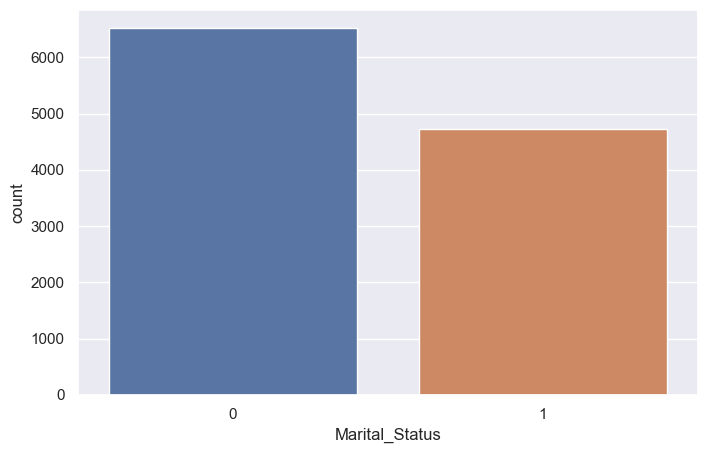

In [58]:
sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(8,5)})


## Q12 Which combinations of marital status and gender contribute the most to the total sales amounts

<Axes: xlabel='Marital_Status', ylabel='Amount'>

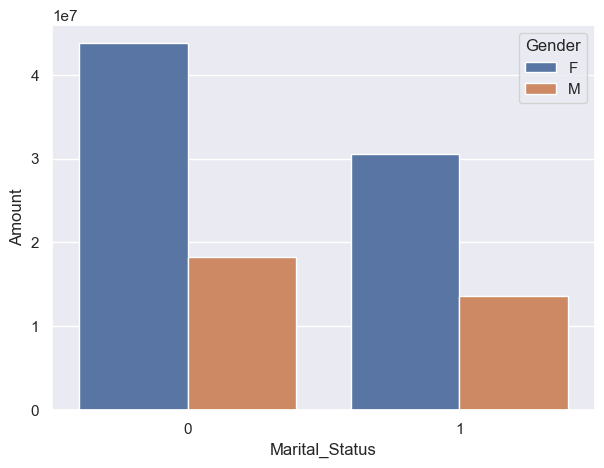

In [59]:
sales_ma=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})

sns.barplot(data=sales_ma, x='Marital_Status', y='Amount',hue='Gender')

###### From the graph we can see that most of the buyers are married (women)and thet have high purchase power

# Occupation 

## Q13.WHAT IS THE NUMBER OF PURCHASE MADE BY DIFFERENT OCCCUPATION

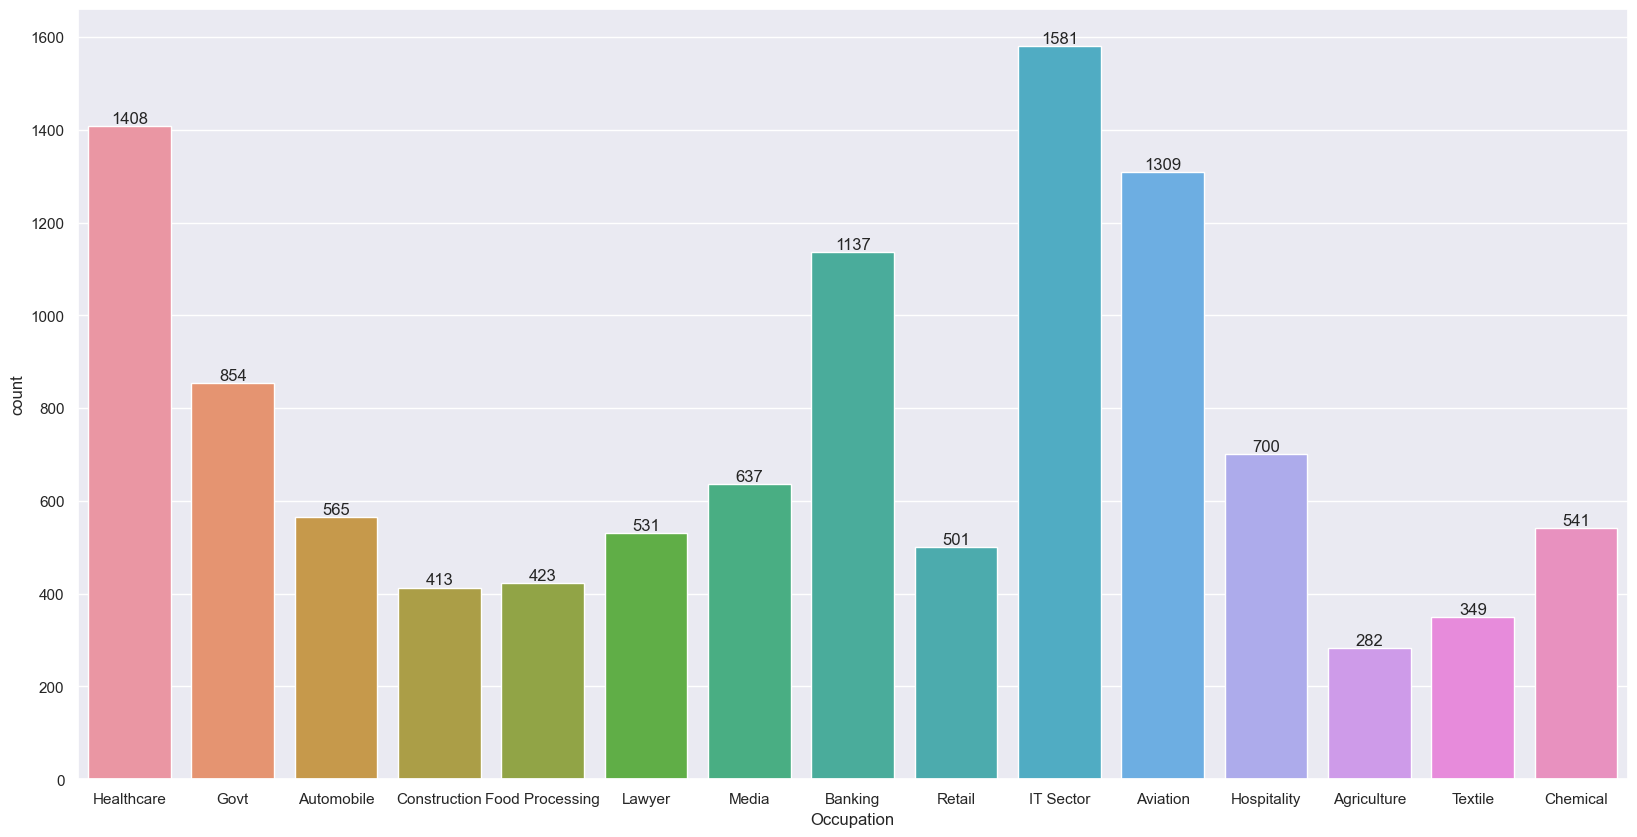

In [60]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.countplot(x='Occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


 ## Q14. WHAT IS THE AMOUNT SPEND BY DIFFERNT OCCUPATIONS ON PURCHACHING?

<Axes: xlabel='Occupation', ylabel='Amount'>

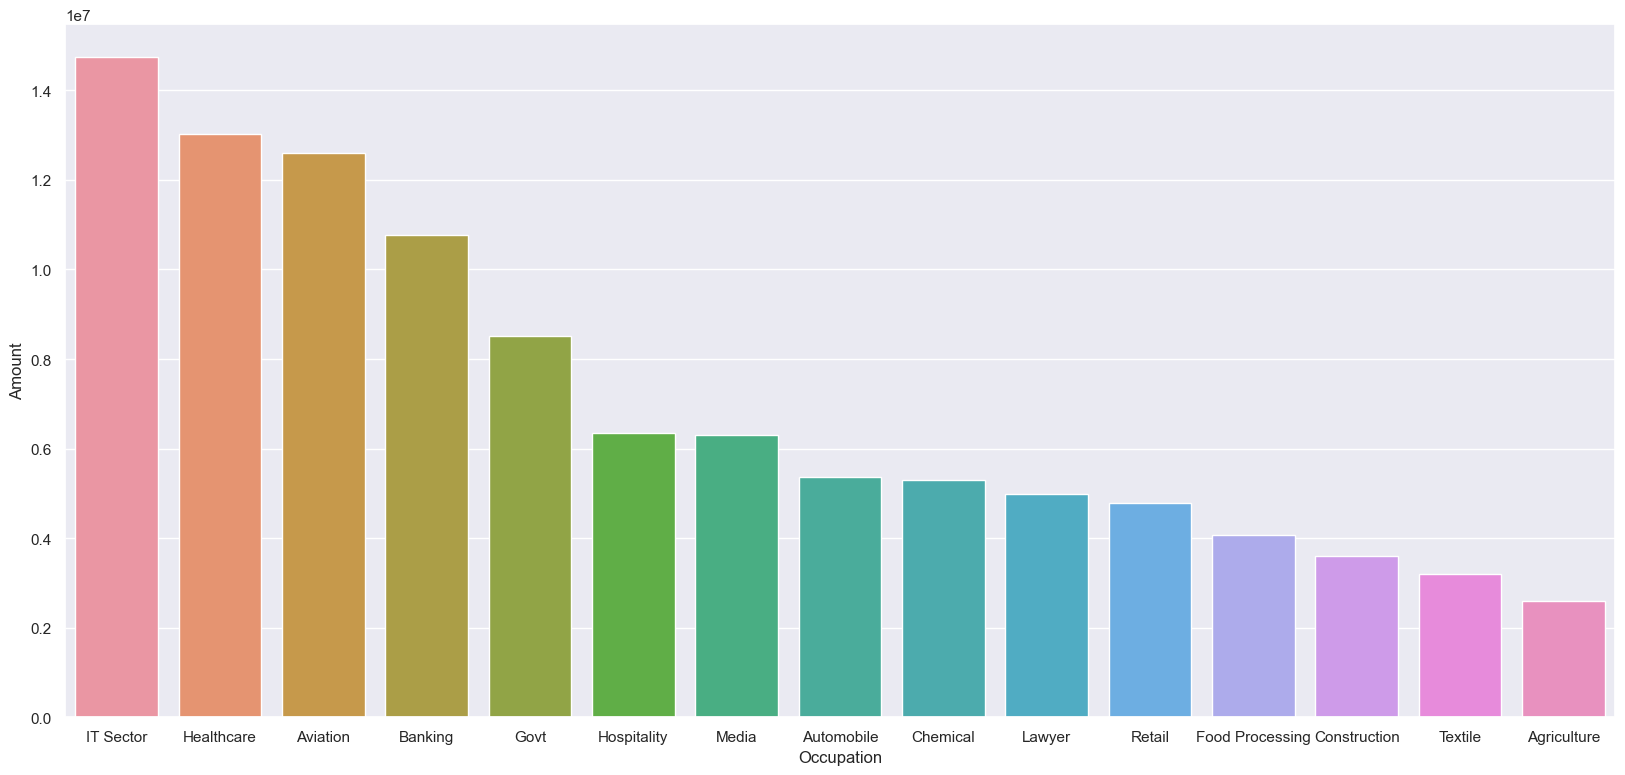

In [61]:
sales_occ=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,9)})

sns.barplot(data=sales_occ, x='Occupation', y='Amount')

##### From the we cn see the most of the buyer are from IT,Healthcare,aviation sector

# Product Category

## Q15 What is the distribution of products across different product categories?

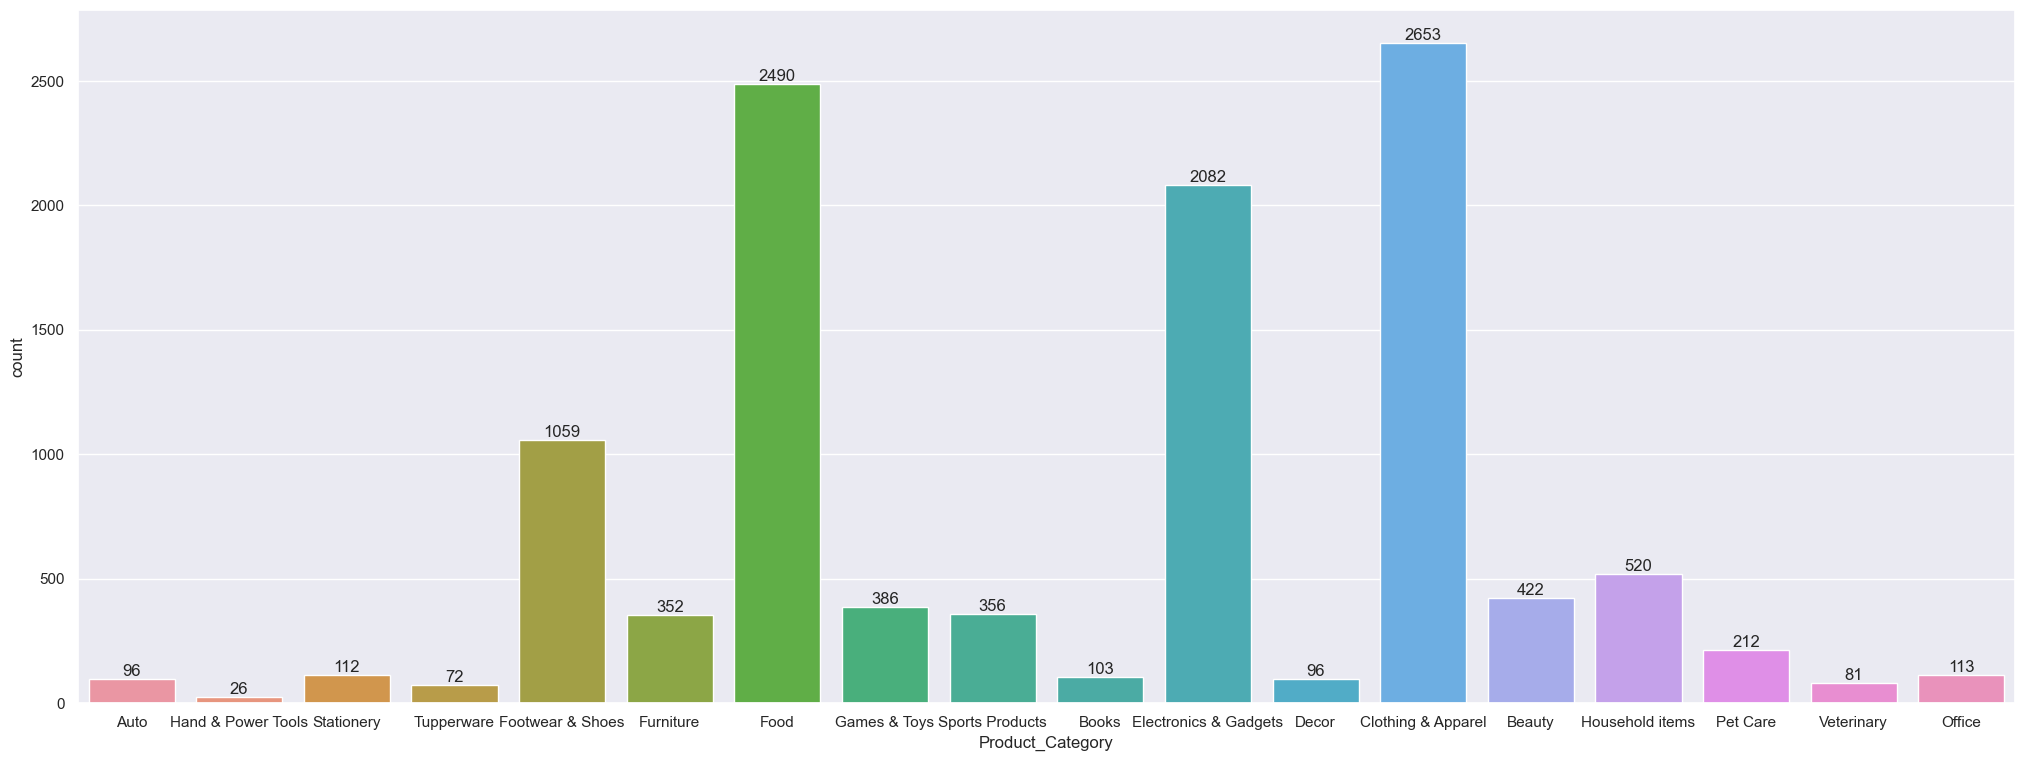

In [62]:
sns.set(rc={'figure.figsize':(25,9)})
ax=sns.countplot(x='Product_Category',data=df)

for bars in ax.containers:
    ax.bar_label(bars)


## Q16 Which product categories contribute the most to the total sales amounts

<Axes: xlabel='Product_Category', ylabel='Amount'>

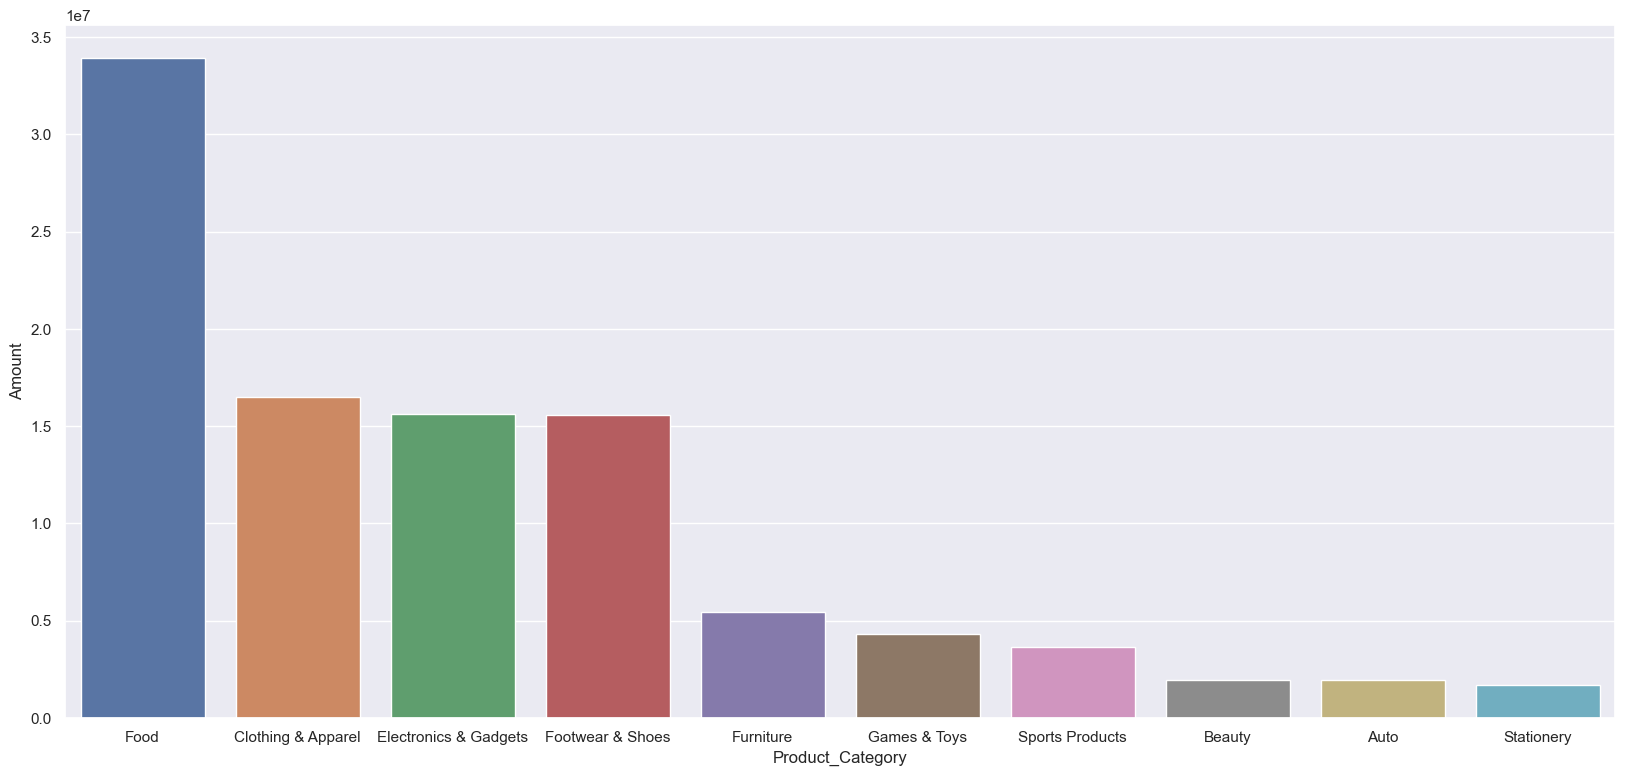

In [63]:
sales_pro=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,9)})

sns.barplot(data=sales_pro, x='Product_Category', y='Amount')

##### above graph we can see that most of the sold product are from Food ,Clothing  and Electronics category

## Q17. What correlations can be observed among the numerical columns 'Age,' 'Orders,' and 'Amount' in the dataset

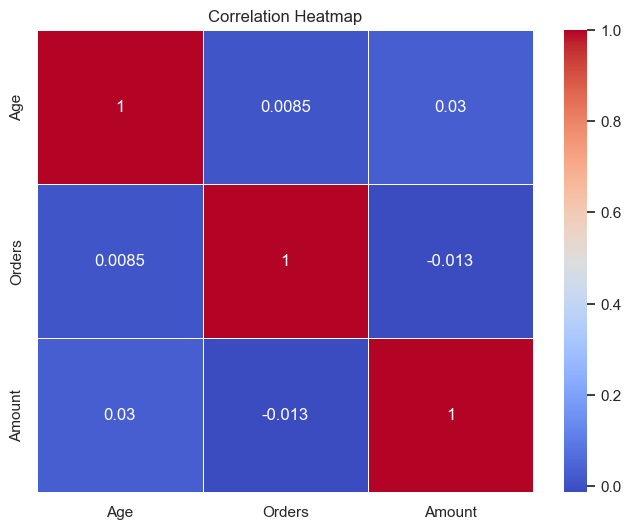

In [64]:
numerical_columns = ['Age', 'Orders', 'Amount']

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Q18 What is the overall correlation among the numerical columns in the dataset?

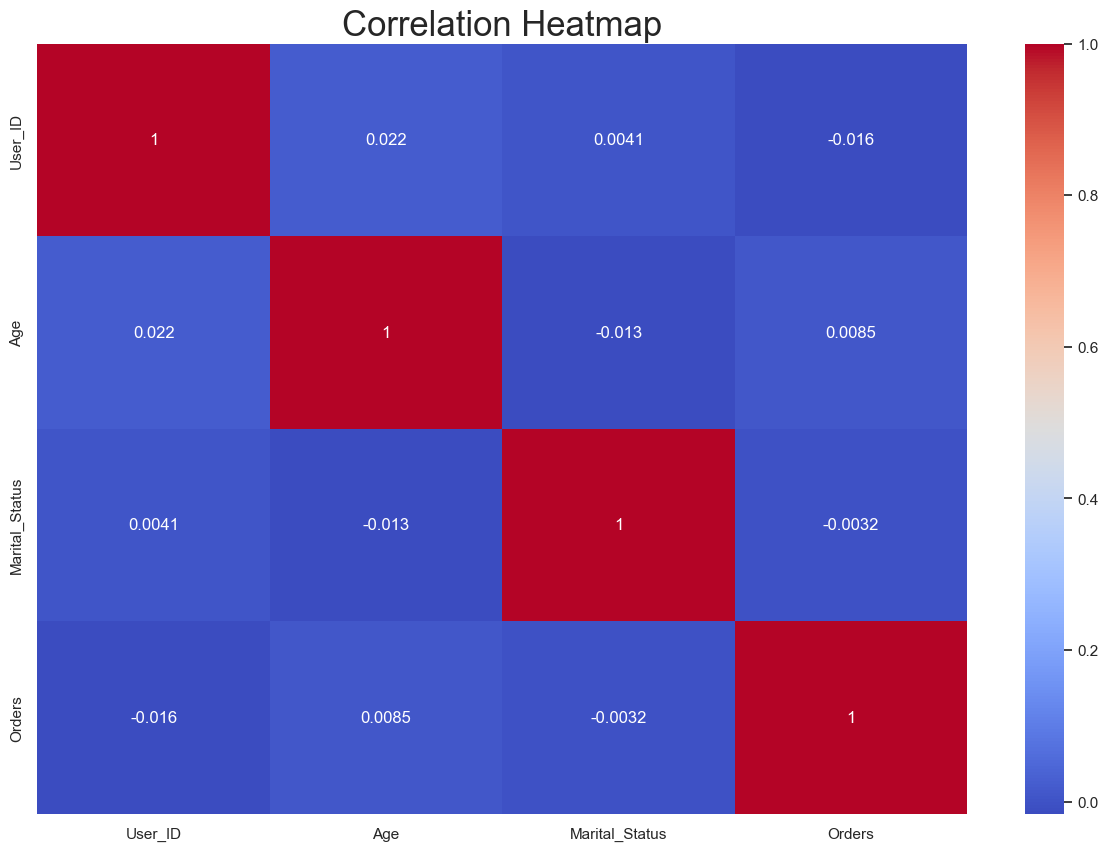

In [65]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])


# Calculate correlation
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=25)
plt.show()



## Q20.Which 'Product_ID' is the most popular or has the highest number of purchases in the dataset?"

In [66]:
most_popular_product = df['Product_ID'].value_counts().idxmax()
print(f"The most popular Product_ID is: {most_popular_product}")

The most popular Product_ID is: P00265242


# CONCLUSION:-----

## Married women age group 26-35 yrs from UP,Maharastra and karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics Category

# Correlation hypothesis testing 

In [67]:
age = df['Age']
amount = df['Amount']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(age, amount)

# Set the significance level (alpha)
alpha = 0.05

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis (Ha): There is a significant correlation between Age and Amount.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant correlation between Age and Amount.")


Pearson Correlation Coefficient: 0.0304
P-Value: 0.0013
Reject the null hypothesis (Ha): There is a significant correlation between Age and Amount.


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


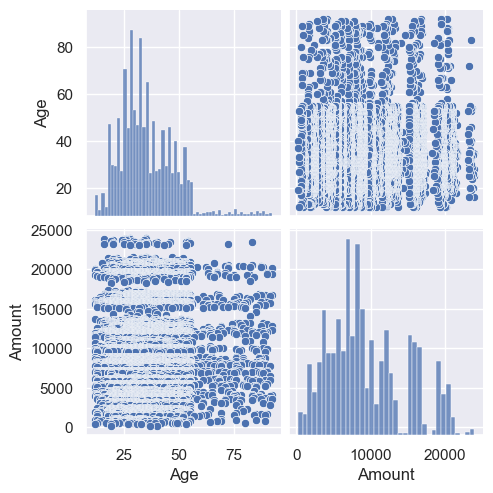

In [68]:
sns.pairplot(df[['Age', 'Amount']])
plt.show()